# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.linear_model import LinearRegression


# Importing Dataset

In [2]:
dataset = pd.read_csv("/content/50_Startups.csv")

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset=dataset.rename(columns={'R&D Spend': 'R&D','Administration': 'Admin','Marketing Spend': 'Market','State': 'Stat','Profit': 'Prof' })

In [5]:
dataset.head()

,R&D,Admin,Market,Stat,Prof
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R&D     50 non-null     float64
 1   Admin   50 non-null     float64
 2   Market  50 non-null     float64
 3   Stat    50 non-null     object 
 4   Prof    50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

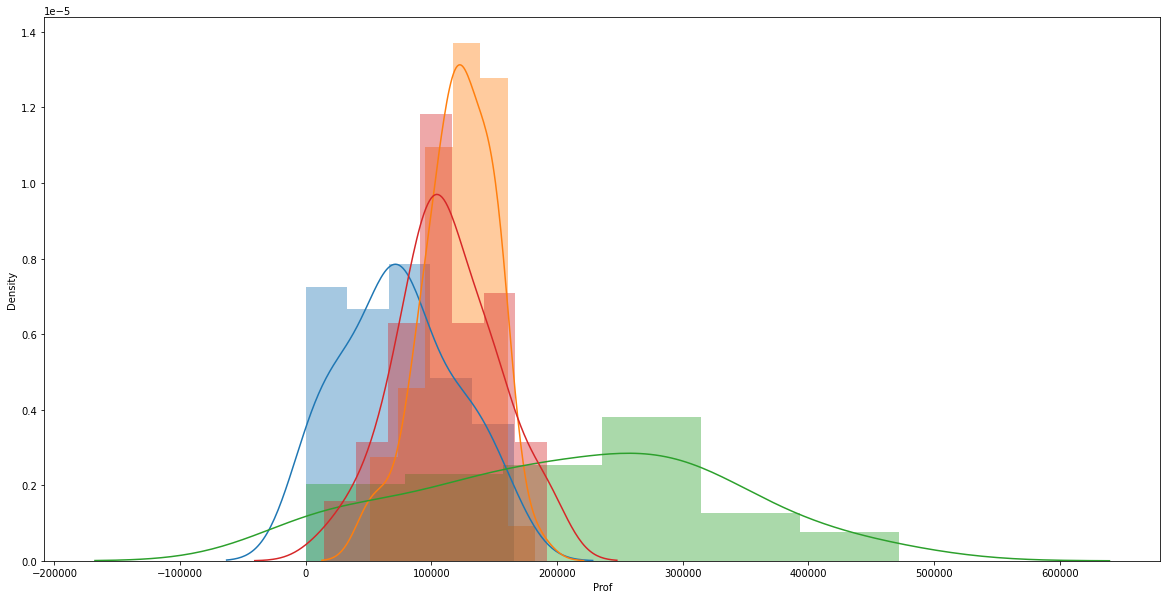

In [7]:
from scipy.stats.distributions import nakagami
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.distplot(dataset['R&D'])
sns.distplot(dataset['Admin'])
sns.distplot(dataset['Market'])
sns.distplot(dataset['Prof'])
plt.show() 

In [8]:
dataset.replace(0, np.nan, inplace=True)

In [9]:
print(dataset)

          R&D      Admin     Market        Stat       Prof
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.

In [10]:
dataset.isnull().sum()

R&D       2
Admin     0
Market    3
Stat      0
Prof      0
dtype: int64

In [11]:
dataset[['R&D', 'Market']] = dataset[['R&D', 'Market']].fillna(dataset[['R&D', 'Market']].mean())

In [12]:
print(dataset)

              R&D      Admin         Market        Stat       Prof
0   165349.200000  136897.80  471784.100000    New York  192261.83
1   162597.700000  151377.59  443898.530000  California  191792.06
2   153441.510000  101145.55  407934.540000     Florida  191050.39
3   144372.410000  118671.85  383199.620000    New York  182901.99
4   142107.340000   91391.77  366168.420000     Florida  166187.94
5   131876.900000   99814.71  362861.360000    New York  156991.12
6   134615.460000  147198.87  127716.820000  California  156122.51
7   130298.130000  145530.06  323876.680000     Florida  155752.60
8   120542.520000  148718.95  311613.290000    New York  152211.77
9   123334.880000  108679.17  304981.620000  California  149759.96
10  101913.080000  110594.11  229160.950000     Florida  146121.95
11  100671.960000   91790.61  249744.550000  California  144259.40
12   93863.750000  127320.38  249839.440000     Florida  141585.52
13   91992.390000  135495.07  252664.930000  California  13430

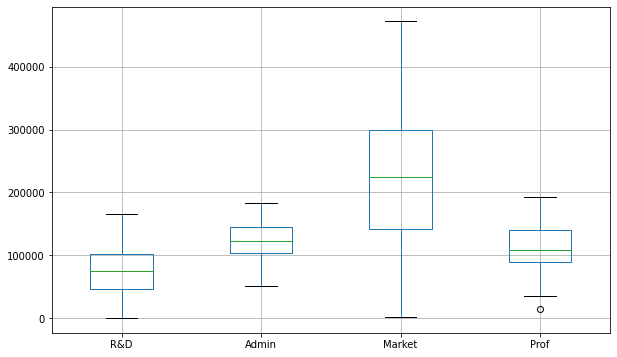

In [13]:
plt.figure(figsize=(10, 6))
dataset.boxplot()
plt.show()

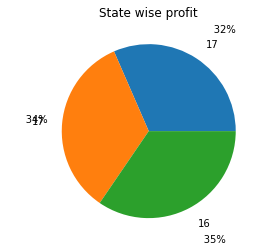

In [14]:
dataset.Stat.unique()
stat = dataset.Stat.value_counts()
df1 = dataset.groupby(['Stat']).Prof.sum()
plt.pie(df1, labels=stat, autopct='%8.0f%%', pctdistance=1.4, labeldistance=1.2)
plt.title('State wise profit')
plt.show()

# Independent and Dependent Variables

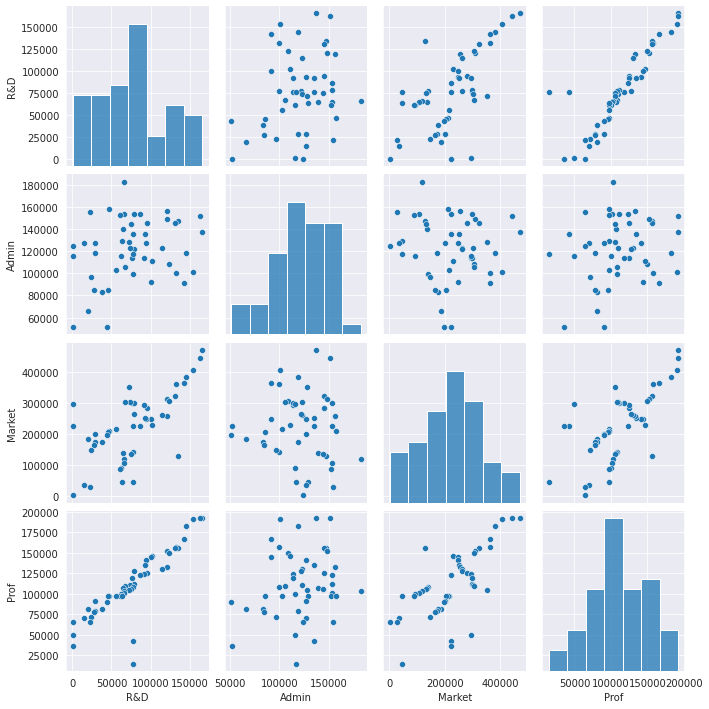

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(dataset)

In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [17]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [18]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

#Encoding Categorical Data

In [19]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [21]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [22]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

# MACHINE LEARNING ALGORITHM

In [23]:
#Fitting the model
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [24]:
#Predict my test results
y_pred = regressor.predict(X)

In [25]:
y_pred

array([192186.38293498, 182831.21013449, 180177.00830542, 171550.35085965,
       169413.70169694, 161226.73623506, 142984.62054281, 158941.80171469,
       150470.08174044, 145818.52307595, 132502.92658281, 126112.90105144,
       128288.36604427, 120607.94812387, 147466.85231791, 142788.20453543,
       111311.3815223 , 130278.64804151, 129508.07603396, 120862.67259471,
       112157.69919108, 119943.26313101, 117565.22284724, 112908.19844923,
       108358.35047993,  94056.13550101, 108021.56740549, 118611.45717211,
       100849.12057376,  98704.96103588,  95576.13993145,  94342.21596782,
        87248.07256825,  98659.52062501,  85945.82184281,  90362.66734967,
        79067.93996818,  82307.03118214,  70638.64365545,  77341.22952857,
        70632.13657392,  75765.51620062,  65214.03547228,  58458.79636301,
        57214.32239264,  46033.62508185,  65672.43130237, 108070.14492369,
        59042.53282163,  96534.76637326])

In [26]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [27]:
print("R2 Squared value: ", r2_score(y,y_pred))

R2 Squared value:  0.8021984704271645


In [28]:
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [29]:

MAE = metrics.mean_absolute_error(y, y_pred)
MSE = metrics.mean_squared_error(y,y_pred)
RMSE = math.sqrt(MSE)
# R2_score = r2_score(y,y_pred)

print("Average absolute error value (MAE):", MAE)
print("Mean square error value (MSE):", MSE)
print("Root mean square of error (RMSE):", RMSE)
print("R2 Squared value: ", r2_score(y,y_pred))

Average absolute error value (MAE): 10929.567425061483
Mean square error value (MSE): 314919105.1141422
Root mean square of error (RMSE): 17745.960247733627
R2 Squared value:  0.8021984704271645


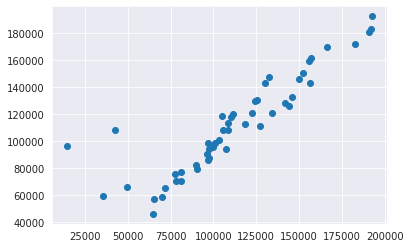

In [30]:
plt.scatter(y,y_pred)

# Using different transformations on dataset to get different r^2 value

Log Transformation

In [31]:
y_log=np.log(y)

In [32]:
#Fitting the model
regressor = LinearRegression()
regressor.fit(X,y_log)

LinearRegression()

In [33]:
#Predict my test results
y_log_pred = regressor.predict(X)

In [34]:
y_log_pred

array([12.31221579, 12.19172746, 12.1680684 , 12.08959806, 12.05334466,
       11.97524128, 11.74506879, 12.02054955, 11.93019309, 11.78758327,
       11.72805014, 11.58687776, 11.72295406, 11.5982986 , 11.91624656,
       11.81674817, 11.51064643, 11.75214702, 11.73359755, 11.66473265,
       11.52093052, 11.6864515 , 11.65151008, 11.59334233, 11.46433423,
       11.345938  , 11.53665536, 11.66383619, 11.52097656, 11.44102617,
       11.38455925, 11.39828765, 11.2431264 , 11.44089785, 11.33123315,
       11.32667906, 11.30813448, 11.16381847, 11.1364504 , 11.15503677,
       11.14464729, 11.21467016, 11.06366786, 11.05792195, 11.02674225,
       10.94109333, 11.22309289, 11.48660077, 11.04046126, 11.30218521])

In [35]:
r2_score(y_log,y_log_pred)

0.5370528639031807

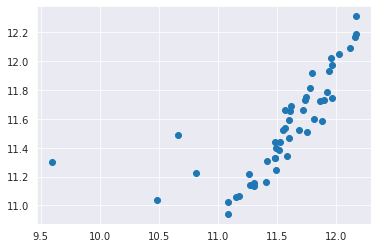

In [44]:
plt.scatter(y_log,y_log_pred)

Sqrt Transformation

In [36]:
y_sqrt=np.sqrt(y)

In [37]:
#Fitting the model
regressor = LinearRegression()
regressor.fit(X,y_sqrt)

LinearRegression()

In [38]:
#Predict my test results
y_sqrt_pred = regressor.predict(X)

In [39]:
r2_score(y_sqrt,y_sqrt_pred)

0.6990992758193881

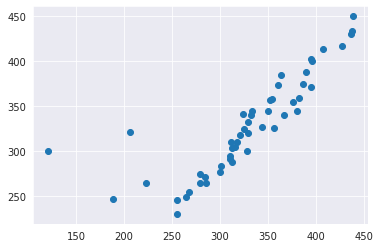

In [45]:
plt.scatter(y_sqrt,y_sqrt_pred)

cbrt Transformation

In [40]:
y_cbrt=np.cbrt(y)

In [41]:
#Fitting the model
regressor = LinearRegression()
regressor.fit(X,y_cbrt)

LinearRegression()

In [42]:
#Predict my test results
y_cbrt_pred = regressor.predict(X)

In [43]:
r2_score(y_cbrt,y_cbrt_pred)

0.650985442178361

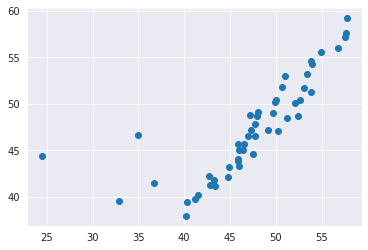

In [46]:
plt.scatter(y_cbrt,y_cbrt_pred)

In [50]:
data = [{'R Square Values': r2_score(y,y_pred)},
        {'R Square Values': r2_score(y_log,y_log_pred)},
        {'R Square Values': r2_score(y_sqrt,y_sqrt_pred)},
        {'R Square Values': r2_score(y_cbrt,y_cbrt_pred)}]

df = pd.DataFrame(data, index =['without any modification',
                                        'transformation using log',
                                        'transformation using sqrt',
                                        'transformation using cbrt'])
df

,R Square Values
without any modification,0.802198
transformation using log,0.537053
transformation using sqrt,0.699099
transformation using cbrt,0.650985


From the above table it is clear that performing different transformation reducing the efficiency of the model,model without transformation are in good agreement.